# Clase 04

###  Desarrollo polinomial

$$
x^7-7x^6+21x^5+35x^4+35x^3-21x^2+7x-1
$$

En Julia:

In [2]:
function polinomial_7mo_grad(x)
    resultado=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1
    return resultado
end

polinomial_7mo_grad (generic function with 1 method)

In [3]:
function polinomial_7mo_grad_sim(x)
    resultado=(x-1)^7
    return resultado
end

polinomial_7mo_grad_sim (generic function with 1 method)

In [5]:
x=range(0.989,0.999,300)
y=@. polinomial_7mo_grad(x)
y_2=@. polinomial_7mo_grad_sim(x)

300-element Vector{Float64}:
 -1.9487171000000122e-14
 -1.9076188200499902e-14
 -1.86726572627229e-14
 -1.827646524823574e-14
 -1.7887500592112548e-14
 -1.7505653090360854e-14
 -1.713081388743756e-14
 -1.676287546383493e-14
 -1.64017316237443e-14
 -1.604727748279599e-14
 -1.5699409455875155e-14
 -1.5358025245012166e-14
 -1.502302382735415e-14
  ⋮
 -8.961172506851479e-21
 -7.535497872098801e-21
 -6.308830960215087e-21
 -5.257462110634693e-21
 -4.359997546140192e-21
 -3.597185397646002e-21
 -2.9517506696851683e-21
 -2.408238910691872e-21
 -1.952868352175973e-21
 -1.5733902808957627e-21
 -1.2589574081047205e-21
 -1.0000000000000063e-21

In [6]:
using Plots

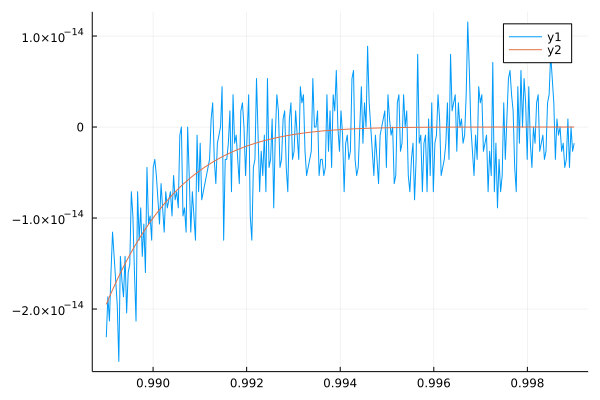

In [46]:
plot(x, y)
plot!(x, y_2)

In [1]:
a=100000
b=0.0000000000000001

c=0
for i=1:10000000
    a=a+b
end

a

100000.0

### Entre menos términos, mejor

Es recomendable:

- Simplificar lo más que se puedan las expresiones.
- Considerar que los errores computacionales se suman a los de nuestro modelo.

# Series

Calcularemos sumas de series, como ejemplo empezaremos con:

$$
    \Sigma_1^{\infty}\frac{1}{2^n}
$$

In [116]:
#=Pseudocódigo:
# Σ(1/2^n)
# suma_0 = valor inicial
# suma_(t+1) = suma(+) + nuevo término

suma_0=1/2
suma_1=suma_0 + 1/2^2
suma_2=suma_1 + 1/2^3

suma_i=1/2
suma_i+1=suma_i+1/2^n

mientras 1/(2^n)>0.00001

o

desde 1 hasta 100 se aplica:
    suma_i+1=suma_i+1/2^n=#

suma=1/2
termino=0.5
for i=2:52
    suma=suma+termino^i
    #print(suma)
end

In [117]:
suma

0.9999999999999998

In [26]:
v_1=[1,-1,2]
v_2=[2,-3,1]

3-element Vector{Int64}:
  2
 -3
  1

In [28]:
length(v_1)[1]

3

In [37]:
#=
Datos de entrada: dos vectores de la misma dimensión
    -Si no son de la misma dimensión regresar NaN o un mensaje de error.
Datos de salida: un escalar
=#

function productopunto(v1,v2)
    n1=length(v1)[1]
    n2=length(v2)[1]
    resultado=0.
    if n1!=n2
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for i=1:n1
        resultado = resultado + v1[i]*v2[i]
    end
    return resultado
end

productopunto (generic function with 1 method)

In [34]:
productopunto(v_1,v_2)

7.0

In [35]:
v_3=[0,0]

2-element Vector{Int64}:
 0
 0

In [38]:
productopunto(v_1,v_3)

"No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"

## Ahora, para la matriz

In [40]:
M_1=[1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [47]:
M_1[1,:]

2-element Vector{Int64}:
 1
 2

In [42]:
length(M_1[1])

1

In [75]:
#= Para la multiplicación de matrices hacemos la generalización de lo anterior:
Av
A(j,i)v_i=Σ(A_ji*b_i)
=#

function MatrizVector(M1,v1)
    ren,col=size(M1)
    n=length(v1)
    resultado=zeros(ren)
    if col!=n
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for j=1:ren
        for i=1:col
            resultado[j] = resultado[j] + M1[j,i]*v1[i]
        end
    end
    return resultado
end

MatrizVector (generic function with 1 method)

In [65]:
Matriz=ones(3,4)

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [74]:
Matriz[1,1]

1.0

In [72]:
size(Matriz)

(3, 4)

In [77]:
Vector_=ones(4)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

In [78]:
MatrizVector(Matriz, Vector_)

3-element Vector{Float64}:
 4.0
 4.0
 4.0

In [85]:
#= Para la multiplicación de matrices hacemos la generalización de lo anterior:
Av
A(j,i)v_i=Σ(A_ji*b_i)
=#

function MatrizVector_con_producto(M1,v1)
    ren,col=size(M1)
    n=length(v1)
    resultado=zeros(ren)
    if col!=n
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for j=1:ren
        for i=1:col
            resultado[j] = productopunto(M1[j,:],v1)
        end
    end
    return resultado
end

MatrizVector_con_producto (generic function with 1 method)

In [86]:
MatrizVector_con_producto(Matriz,Vector_)

3-element Vector{Float64}:
 4.0
 4.0
 4.0

# Producto entre matrices

In [100]:
#

function MatrizMatriz(M1,M2)
    ren1,col1=size(M1)
    ren2,col2=size(M2)
    resultado=zeros(ren1,col2)
    if ren1!=col2
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for j=1:ren1
        for i=1:col2
            resultado[i,j] = resultado[i,j] + productopunto(M1[j,:],M2[:,i])     
        end
    end
    return resultado
end

MatrizMatriz (generic function with 1 method)

In [105]:
m_1=ones(3,4)
m_2=ones(4,3)

4×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [101]:
MatrizMatriz(m_1,m_2)

"No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"

In [103]:
#

function MatrizMatriz_prof(M1,M2)
    ren1,col1=size(M1)
    ren2,col2=size(M2)
    resultado=zeros(ren1,col2)
    if ren1!=col2
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for j=1:ren1
        for i=1:col2
            for k=1:col1
                resultado[i,j] = resultado[i,j] + M1[i,k]*M2[k,j] 
            end
        end
    end
    return resultado
end

MatrizMatriz_prof (generic function with 1 method)

In [109]:
@time MatrizMatriz_prof(m_1,m_2)

  0.000020 seconds (1 allocation: 128 bytes)


3×3 Matrix{Float64}:
 4.0  4.0  4.0
 4.0  4.0  4.0
 4.0  4.0  4.0

In [111]:
@time MatrizMatriz(m_1,m_2)

  0.000030 seconds (19 allocations: 1.812 KiB)


3×3 Matrix{Float64}:
 4.0  4.0  4.0
 4.0  4.0  4.0
 4.0  4.0  4.0

# Funciones de truncamiento/redondeo

- ceil -> promueve la parte decimal hacia el entero.
- trunc -> elimina despues del punto
- floor -> promueve hacia abajo
- round -> Lo redondea usando el criterio del punto medio

In [121]:
ceil(suma),trunc(suma,digits=5),floor(suma),round(suma)

(1.0, 0.99999, 0.0, 1.0)

In [130]:
round(0.999902, digits=4)

0.9999

In [134]:
?round()

```
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]])
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; digits=, base=10)
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; sigdigits=, base=10)
```

Return the nearest integral value of the same type as the complex-valued `z` to `z`, breaking ties using the specified [`RoundingMode`](@ref)s. The first [`RoundingMode`](@ref) is used for rounding the real components while the second is used for rounding the imaginary components.

# Example

```jldoctest
julia> round(3.14 + 4.5im)
3.0 + 4.0im
```

---

```
round([T,] x, [r::RoundingMode])
round(x, [r::RoundingMode]; digits::Integer=0, base = 10)
round(x, [r::RoundingMode]; sigdigits::Integer, base = 10)
```

Rounds the number `x`.

Without keyword arguments, `x` is rounded to an integer value, returning a value of type `T`, or of the same type of `x` if no `T` is provided. An [`InexactError`](@ref) will be thrown if the value is not representable by `T`, similar to [`convert`](@ref).

If the `digits` keyword argument is provided, it rounds to the specified number of digits after the decimal place (or before if negative), in base `base`.

If the `sigdigits` keyword argument is provided, it rounds to the specified number of significant digits, in base `base`.

The [`RoundingMode`](@ref) `r` controls the direction of the rounding; the default is [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer. Note that `round` may give incorrect results if the global rounding mode is changed (see [`rounding`](@ref)).

# Examples

```jldoctest
julia> round(1.7)
2.0

julia> round(Int, 1.7)
2

julia> round(1.5)
2.0

julia> round(2.5)
2.0

julia> round(pi; digits=2)
3.14

julia> round(pi; digits=3, base=2)
3.125

julia> round(123.456; sigdigits=2)
120.0

julia> round(357.913; sigdigits=4, base=2)
352.0
```

!!! note
    Rounding to specified digits in bases other than 2 can be inexact when operating on binary floating point numbers. For example, the [`Float64`](@ref) value represented by `1.15` is actually *less* than 1.15, yet will be rounded to 1.2.

    # Examples

    ```jldoctest; setup = :(using Printf)
    julia> x = 1.15
    1.15

    julia> @sprintf "%.20f" x
    "1.14999999999999991118"

    julia> x < 115//100
    true

    julia> round(x, digits=1)
    1.2
    ```


# Extensions

To extend `round` to new numeric types, it is typically sufficient to define `Base.round(x::NewType, r::RoundingMode)`.

---

```
round(dt::TimeType, p::Period, [r::RoundingMode]) -> TimeType
```

Return the `Date` or `DateTime` nearest to `dt` at resolution `p`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 9:30 to the nearest hour) will be rounded up.

For convenience, `p` may be a type instead of a value: `round(dt, Dates.Hour)` is a shortcut for `round(dt, Dates.Hour(1))`.

```jldoctest
julia> round(Date(1985, 8, 16), Dates.Month)
1985-08-01

julia> round(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:30:00

julia> round(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-07T00:00:00
```

Valid rounding modes for `round(::TimeType, ::Period, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

---

```
round(x::Period, precision::T, [r::RoundingMode]) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 90 minutes to the nearest hour) will be rounded up.

For convenience, `precision` may be a type instead of a value: `round(x, Dates.Hour)` is a shortcut for `round(x, Dates.Hour(1))`.

```jldoctest
julia> round(Dates.Day(16), Dates.Week)
2 weeks

julia> round(Dates.Minute(44), Dates.Minute(15))
45 minutes

julia> round(Dates.Hour(36), Dates.Day)
2 days
```

Valid rounding modes for `round(::Period, ::T, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.


In [133]:
digitos=0
for i=1:6
    println(round(2.625371,digits=i-1))
end

3.0
2.6
2.63
2.625
2.6254
2.62537


In [135]:
?floor()

```
floor([T,] x)
floor(x; digits::Integer= [, base = 10])
floor(x; sigdigits::Integer= [, base = 10])
```

`floor(x)` returns the nearest integral value of the same type as `x` that is less than or equal to `x`.

`floor(T, x)` converts the result to type `T`, throwing an `InexactError` if the value is not representable.

Keywords `digits`, `sigdigits` and `base` work as for [`round`](@ref).

---

```
floor(x::Period, precision::T) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` down to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`.

For convenience, `precision` may be a type instead of a value: `floor(x, Dates.Hour)` is a shortcut for `floor(x, Dates.Hour(1))`.

```jldoctest
julia> floor(Dates.Day(16), Dates.Week)
2 weeks

julia> floor(Dates.Minute(44), Dates.Minute(15))
30 minutes

julia> floor(Dates.Hour(36), Dates.Day)
1 day
```

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.

---

```
floor(dt::TimeType, p::Period) -> TimeType
```

Return the nearest `Date` or `DateTime` less than or equal to `dt` at resolution `p`.

For convenience, `p` may be a type instead of a value: `floor(dt, Dates.Hour)` is a shortcut for `floor(dt, Dates.Hour(1))`.

```jldoctest
julia> floor(Date(1985, 8, 16), Dates.Month)
1985-08-01

julia> floor(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:30:00

julia> floor(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-06T00:00:00
```


In [138]:
digitos=0
for i=1:2:6
    println(floor(2.625371,digits=i-1))
end

2.0
2.62
2.6253


In [139]:
for n ∈ 1:4
    println(n)
end

1
2
3
4


In [140]:
A="Esto es  una cadena"
for n ∈ A
    println(n)
end

E
s
t
o
 
e
s
 
 
u
n
a
 
c
a
d
e
n
a


In [141]:
# Se hizo el cambio para usar el for de manera comprimida 
# es decir, equivalentes entre anidados y en la misma linea.
function MatrizVector_2(M1,v1)
    ren,col=size(M1)
    n=length(v1)
    resultado=zeros(ren)
    if col!=n
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for j=1:ren, i=1:col
        resultado[j] = resultado[j] + M1[j,i]*v1[i]
    end
    return resultado
end

MatrizVector_2 (generic function with 1 method)

In [144]:
M_1=ones(2,2)
v_1=ones(2)

2-element Vector{Float64}:
 1.0
 1.0

In [146]:
println(MatrizVector_2(M_1,v_1))

[2.0, 2.0]


In [152]:
#Ahora para la multiplicacion de matrices

function MatrizMatriz_prof_compri(M1,M2)
    ren1,col1=size(M1)
    ren2,col2=size(M2)
    resultado=zeros(ren1,col2)
    if col1!=ren2
        return "No es posible hacer el producto punto, los vectores deben de tener la misma dimensión"
    end
    for i=1:ren1, j=1:col2, k=1:col1
        resultado[i,j] = resultado[i,j] + M1[i,k]*M2[k,j] 
    end
    return resultado
end

MatrizMatriz_prof_compri (generic function with 1 method)

In [154]:
Mat1=ones(2,3)
Mat2=ones(3,5)
MatrizMatriz_prof_compri(Mat1,Mat2)

2×5 Matrix{Float64}:
 3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0

# Introducción a OOP (Object Oriented Programing)

- Los datos son lo importante
- Los datos relevantes son abstraídos como objetos que interactúan entre ellos.
- Se busca tener un mejor control en programas mucho más complejos.
    - Evitar modificar datos fuera de un ámbito.


## Clases, objetos e instancias

- Clase: Generalizaciones de tipos da datos que agrupa características y comportamientos semejantes.
- Comformada por rasgos y comportamientos.
    - Los rasgos se llaman atributos.
    - Los comportamientos se llaman métodos.
- Objeto: Es una representación partícular de una clase.
    - Un elemento específico de ese conjunto.
- Instancia: En programación orientada a objetos es la selección de un elemento del conjunto a partir de determinar su rasgos y comportamientos particulares.

Por ejemplo el conjunto de los racionales puede ser considerado una clase, es decir:
$$
Q=\{p/q| (p,q) \in Z, q \neq 0\}
$$

## Ejemplos mundanos de clases:

- Muebles:
    - Comedores
        - Sillas
- Vehículos:
    - Terrestres.
        - Urbanos.
            - Coches.
- Números.
- Partículas:
    - Planetas
        - Continentes
            - Países

## Ejemplos mundanos de objetos:

- Una sala.
- Combi.
- Vía Láctea
- Reales.

##  Ejemplos mundanos de instancias:

- Comedor de la casa de Fulano.
- VolkswagenBeetle 1970 azul de Perengano.
- 134287.978... - 789548.9814...i
- Descubrimiento de Plutón el 18 de febrero de 1930.
- Descubrimiento de la Galaxia Andrómeda el 23 de noviembre de 1924.

## Encapsulamiento

Característica de un lenguaje orientado a objetos de lograr que todo lo referente a un ojeto quede aislado dentro del mismo.

Los datos referentes a un objeto quedan encerrados y solo se pueden acceder a través de los miembros que la clase proporcione.

Es decir, los datos que conforman un objeto queda agrupados y aislados de otros datos, y solo se pueden consultar usando como referencia al objeto al que pertenecen.

Ejemplos muy genéricos:
- La temperatura de la atmósfera de Ío, luna de Júpiter.
- La temperatura de la corona del Sol.

## Herencia

En OOP cuando una clase hereda otra, obtiene los rasgos que tiene la primera.

Añade nuevos rasgos y puede modificar algunos de los que ha heredado.

De la que se jereda se llama clase base.

La que se hereda se llama clase derivada.

Es la ventaja de poder describir entidades complejas a partir de entidades más simples, agregando nuevas caracerísticas para ser más específico, sin tener que describir de forma exhaustiva desde el principio.

Permite reutilizar declaraciones previas.

Ejemplos:

- Partícula: Masa, velocidad y aceleración.
- Planeta: Partícula, con radio y composición.

## Polimorfismo

Se refiere al hecho de que varios objetos de diferentes clases pero con una base común, se pueden usar de manera indistinta sin tener que saber de qué clase exacta son para poder usarse.

La capacidad de clarar dos tipos de objetos suficientemente distintos, par ano formar parte del mismo conjunto, pero suficientemente iguales para usarse indistintamente.

Ejemplo:

- Caballo (Equus caballus)
- Burro
- Camello
- Llama

Donde todos se utilizan como apoyo en actividades de producción antes de la revolución industrial.

[MaxPixel]

### Datos definidos por usuario, en julia: datos struct

In [178]:
struct Persona #Estructuras definidas por el usuario, es posible anidarlas.
    nombre::String
    edad::UInt8 #U para que sean positivos.
    direccion::String
end

In [182]:
Pepe=Persona("José B Dominguez",26,"En algún lugar de Queretaro")

Persona("José B Dominguez", 0x1a, "En algún lugar de Queretaro")

In [170]:
typeof(Pepe)

Persona

In [183]:
typeof(Pepe.edad)

UInt8

In [173]:
?UInt8

search: UInt8 UInt128 @uint128_str UInt UInt64 UInt32 UInt16 Cuint Cuintmax_t



```
UInt8 <: Unsigned
```

8-bit unsigned integer type.


In [184]:
println(Pepe.edad)

26


In [185]:
Pacientes=Persona[] #Al definir una estructura de datos podemos asignar a otro objeto con las mismas características.
push!(Pacientes, Persona("Alonso Quijano", 64, "En algun lugar de la Mancha"))

1-element Vector{Persona}:
 Persona("Alonso Quijano", 0x40, "En algun lugar de la Mancha")

In [186]:
push!(Pacientes,Pepe)

2-element Vector{Persona}:
 Persona("Alonso Quijano", 0x40, "En algun lugar de la Mancha")
 Persona("José B Dominguez", 0x1a, "En algún lugar de Queretaro")

In [187]:
mutable struct Helados
    marca::String
    sabor::String
    cantidad::UInt64
end

In [188]:
helado1=Helados("Patito", "Vainilla",62)

Helados("Patito", "Vainilla", 0x000000000000003e)

In [189]:
helado1.marca="Propia"

"Propia"

In [190]:
helado1

Helados("Propia", "Vainilla", 0x000000000000003e)